In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.pyplot import *

#plt.rc('font', family='Malgun Gothic')
#mpl.rc('font', family='Malgun Gothic')
plt.rcParams["font.family"] = 'Malgun Gothic'
matplotlib.style.use('fivethirtyeight')

In [3]:
dlvr_call=pd.read_csv('./KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')
dlvr_call=dlvr_call[dlvr_call['DLVR_STORE_BRTC_NM'] == '서울특별시']

corona = pd.read_csv('./covid_19_dataset/PatientInfo.csv')
corona=corona[corona['province'] == 'Seoul']

In [ ]:
# 배달 건수와 확진자 수의 상관관계 분석

# 분석 시작일, 종료일
start_date = "2020-02-21"
end_date = "2020-05-31"


# 분석 시작일과 종료일 사이의 배달 건수 select
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] >= start_date]
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] <= end_date]

# 월 
dlvr_call['DATE']=pd.to_datetime(dlvr_call['PROCESS_DT'],format="%Y-%m")
dlvr_call.set_index('DATE',inplace=True)

# 배달 완료된 주문만 사용
#dlvr_completed = dlvr_call["DLVR_REQUST_STTUS_VALUE"] == 1
#dlvr = dlvr[dlvr_completed]
dlvr_call_1M = dlvr_call.groupby(by=[dlvr_call.index.year, dlvr_call.index.month])[["GOODS_AMOUNT"]].count()
dlvr_call_1M=dlvr_call_1M[['month_year','GOODS_AMOUNT']]

corona = corona[corona["confirmed_date"] >= start_date]
corona = corona[corona["confirmed_date"] <= end_date]


#ax = corona.groupby(["confirmed_date"]).count()

#plt.plot(use_index = True, y = "patient_id", figsize = (20, 10), title = "일일확진자 수")

patient_date = set(sorted(pd.unique(covid_patient["confirmed_date"])))
dlvr_date = set(sorted(pd.unique(dlvr[dlvr_completed]["PROCESS_DT"])))


intersect_date = list(patient_date & dlvr_date)

#월별 확진자 수
corona['DATE']=pd.to_datetime(corona['date'],format="%Y-%m-%d")
corona.set_index('DATE',inplace=True)

covid_groupby = corona.groupby(by=[corona.index.year, corona.index.month]).sum({"confirmed"})

#covid_groupby.plot(use_index = True, y = "confirmed", figsize = (20, 10))


dlvr_test = pd.DataFrame(dlvr[dlvr[dlvr_completed]["PROCESS_DT"].isin(intersect_date)].groupby(["PROCESS_DT"]).sum(["DLVR_REQUST_STTUS_VALUE"])["DLVR_REQUST_STTUS_VALUE"])
dlvr_test["test"] = covid_patient[covid_patient["confirmed_date"].isin(intersect_date)].groupby(["confirmed_date"]).count()["patient_id"]

dlvr_test.corr()

plt.plot(dlvr[dlvr[dlvr_completed]["PROCESS_DT"].isin(intersect_date)].groupby(["PROCESS_DT"]).sum(["DLVR_REQUST_STTUS_VALUE"])["DLVR_REQUST_STTUS_VALUE"])
plt.plot(covid_patient[covid_patient["confirmed_date"].isin(intersect_date)].groupby(["confirmed_date"]).count()["patient_id"])

In [5]:
# 배달 건수와 확진자 수의 상관관계 분석

# 분석 시작일, 종료일
start_date = "2020-02-21"
end_date = "2020-05-31"


# 분석 시작일과 종료일 사이의 배달 건수 select
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] >= start_date]
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] <= end_date]

# 월 
dlvr_call['DATE']=pd.to_datetime(dlvr_call['PROCESS_DT'],format="%Y-%m")
dlvr_call.set_index('DATE',inplace=True)

# 배달 완료된 주문만 사용
#dlvr_completed = dlvr_call["DLVR_REQUST_STTUS_VALUE"] == 1
#dlvr = dlvr[dlvr_completed]
dlvr_call_1M = dlvr_call.groupby(by=[dlvr_call.index.year, dlvr_call.index.month])[["GOODS_AMOUNT"]].count()
#dlvr_call_1M=dlvr_call_1M[['month_year','GOODS_AMOUNT']]

(0.7842484776793985, 0.21575152232060146)

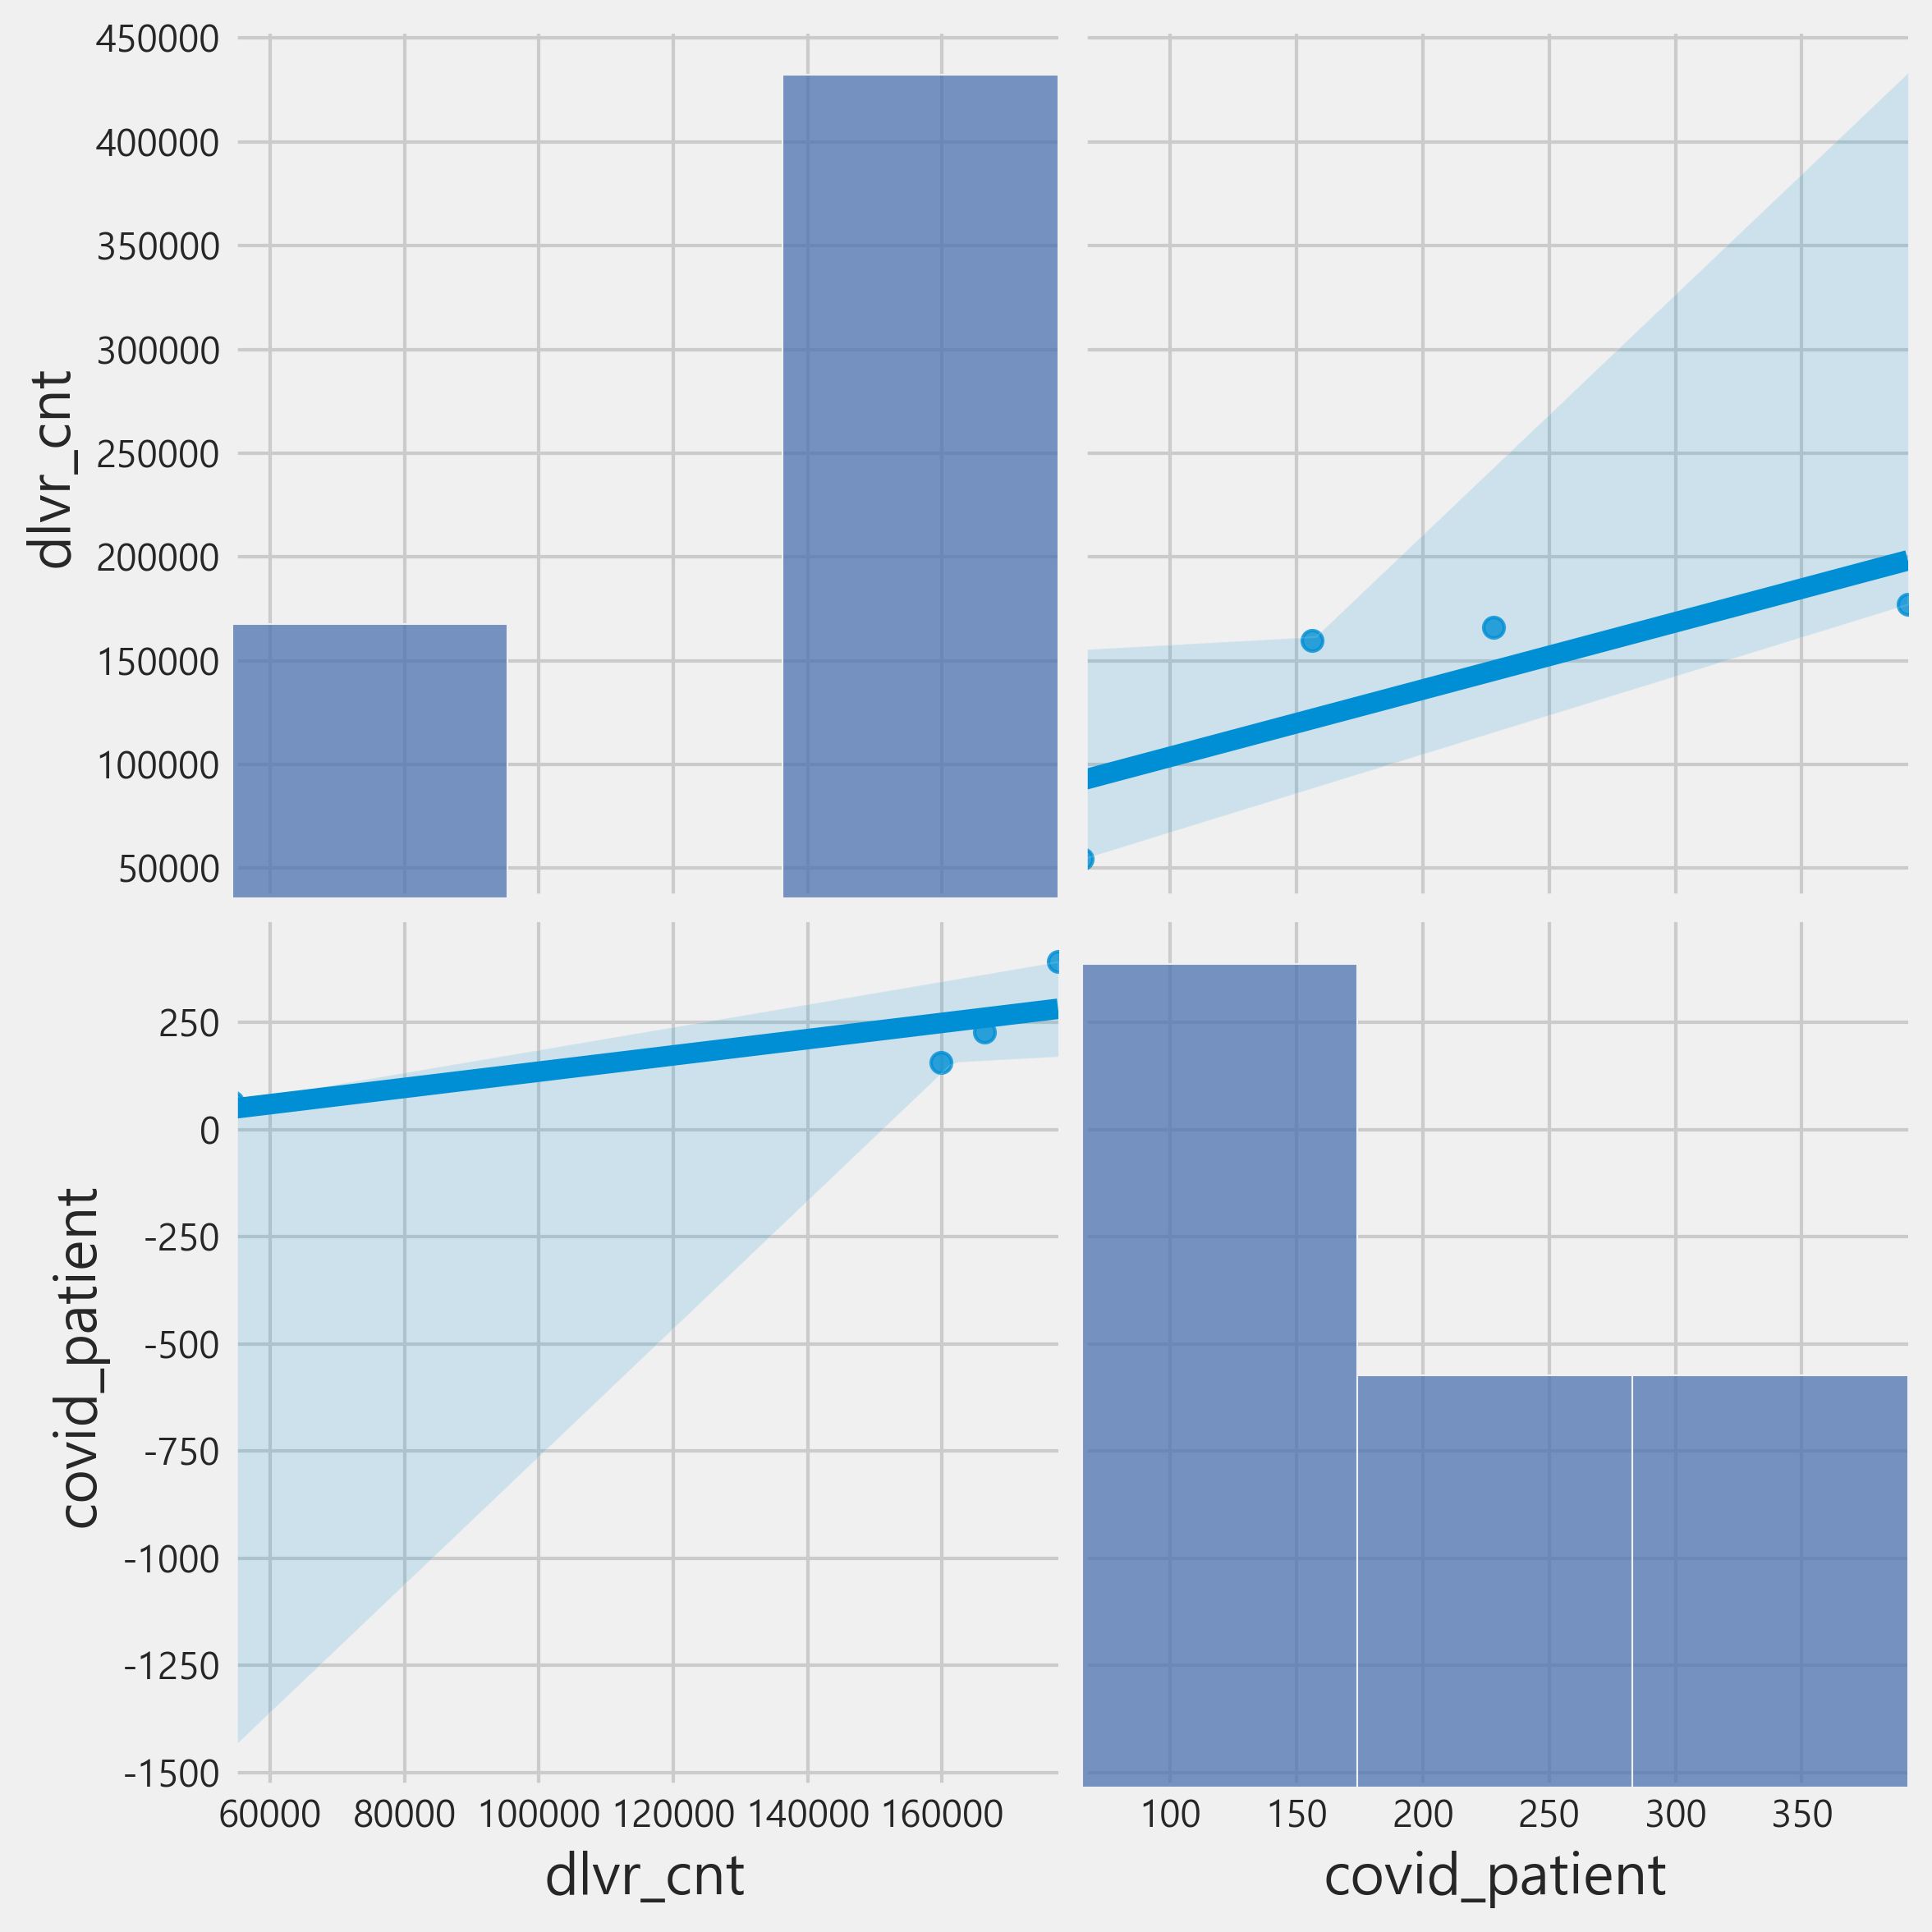

In [36]:
# 분석 시작일, 종료일
start_date = "2020-02-21"
end_date = "2020-05-31"


# 분석 시작일과 종료일 사이의 배달 건수 select
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] >= start_date]
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] <= end_date]
dlvr_call_cnt = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].count().to_records())
dlvr_call_cnt['PROCESS_DT']=pd.to_datetime(dlvr_call_cnt['PROCESS_DT'])
dlvr_call_cnt['month_year'] = dlvr_call_cnt['PROCESS_DT'].dt.to_period('M')

dlvr_call_1M_cnt = pd.DataFrame(dlvr_call_cnt.groupby('month_year')[['GOODS_AMOUNT']].sum().to_records())

corona = corona[corona["confirmed_date"] >= start_date]
corona = corona[corona["confirmed_date"] <= end_date]

corona_cnt = pd.DataFrame(corona.groupby('confirmed_date')[['country']].count().to_records())

corona_cnt['confirmed_date']=pd.to_datetime(corona_cnt['confirmed_date'])
corona_cnt['month_year'] = corona_cnt['confirmed_date'].dt.to_period('M')

corona_1M_cnt = pd.DataFrame(corona_cnt.groupby('month_year')[['country']].sum().to_records())

#상관관계분석
correlation=dlvr_call_1M_cnt.join(corona_1M_cnt.set_index('month_year'), on= 'month_year')
correlation.columns=['Date','dlvr_cnt','covid_patient']

#그래프 시각화
sns.pairplot(correlation, kind='reg', height=4) 


# 피어슨 상관계수 검정
corr = stats.pearsonr(correlation.dlvr_cnt, correlation.covid_patient)
corr

In [22]:
# 분석 시작일, 종료일
start_date = "2020-02-21"
end_date = "2020-05-31"

# 분석 시작일과 종료일 사이의 배달 건수 select
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] >= start_date]
dlvr_call = dlvr_call[dlvr_call["PROCESS_DT"] <= end_date]
dlvr_call_cnt = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].count().to_records())


corona = corona[corona["confirmed_date"] >= start_date]
corona = corona[corona["confirmed_date"] <= end_date]

corona_cnt = pd.DataFrame(corona.groupby('confirmed_date')[['country']].count().to_records())

In [25]:
corona_cnt.columns=['DATE','covid']

In [28]:
dlvr_call_cnt.columns=['DATE','dlvr_cnt']

In [32]:
correlation=dlvr_call_cnt.join(corona_cnt.set_index('DATE'), on= 'DATE',how='inner')

In [33]:
correlation

,DATE,dlvr_cnt,covid
0,2020-02-21,6003,2
1,2020-02-22,7683,4
2,2020-02-23,6983,4
3,2020-02-24,4446,2
4,2020-02-25,5328,8
...,...,...,...
95,2020-05-27,4248,25
96,2020-05-28,4805,19
97,2020-05-29,5511,9
98,2020-05-30,6751,6


(-0.09423457297162374, 0.3797285596446815)

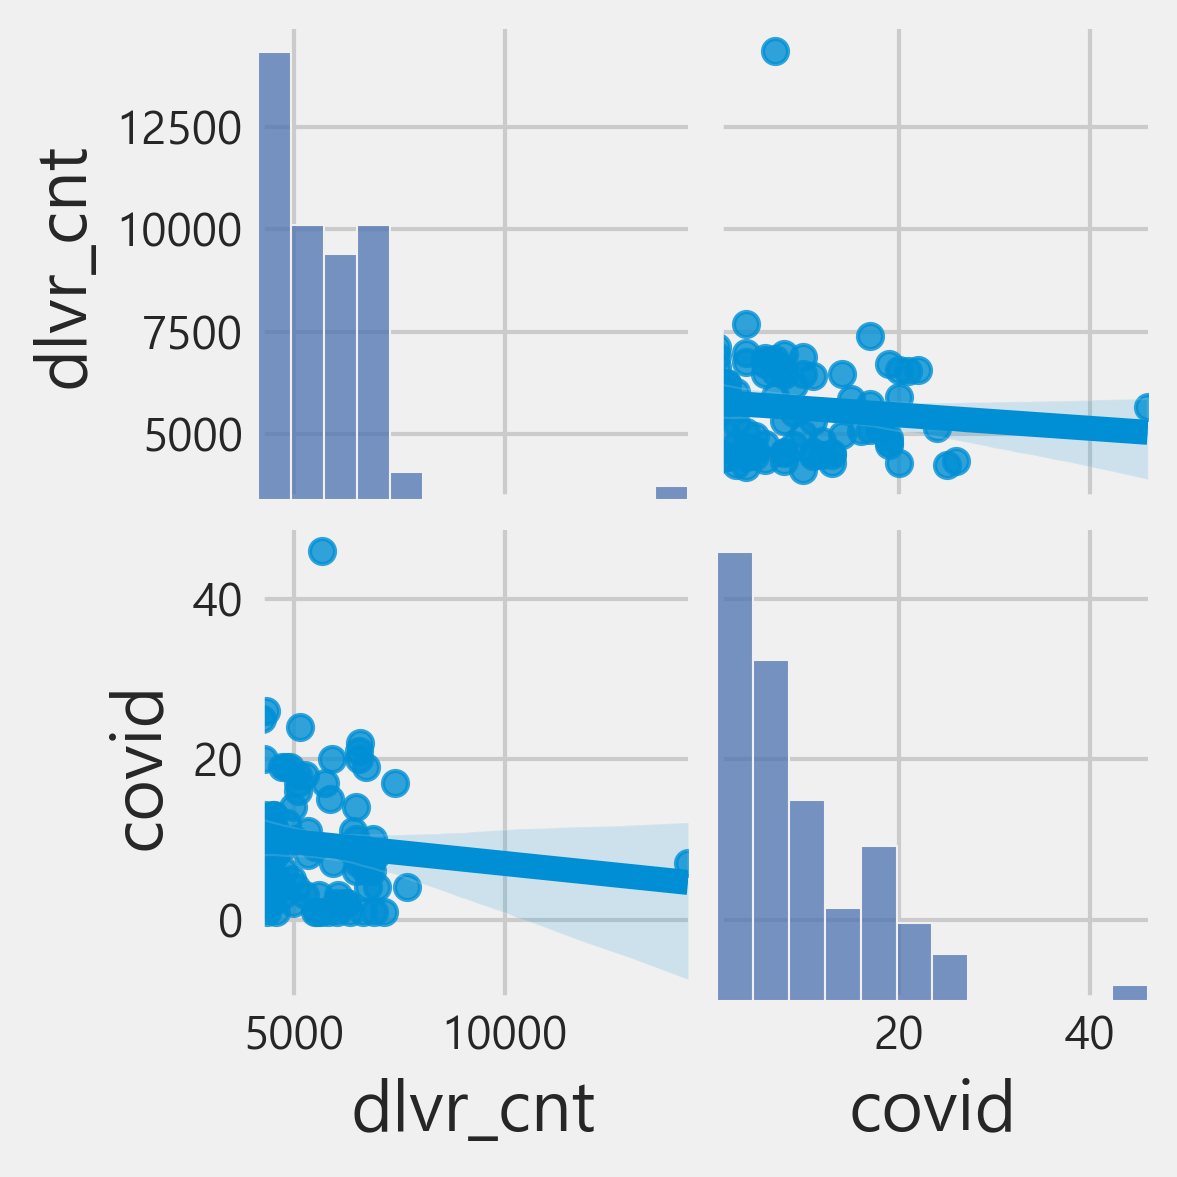

In [35]:
sns.pairplot(correlation, kind='reg', height=2) 


# 피어슨 상관계수 검정
corr = stats.pearsonr(correlation.dlvr_cnt, correlation.covid)
corr